In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

# Melbourne Vacation Rentals Market Analysis


Vacation rentals, also called short-stay rentals, are booming in Melbourne. Lots of us have used or at least know someone has used vacation rental apps like Airbnb, HomeAway, etc. Melbourne was announced as [6th](https://www.businessinsider.com.au/heres-how-big-airbnb-is-in-sydney-and-how-it-compares-to-the-rest-of-the-world-2016-5) on the list of top ten cities for users globally in 2016 and has been one of the top cities for listings globally since then. 

As a data scientist who also travells and hosts on Airbnb, I wanted to know what the market looks like in Melbourne, how other hosts are doing, the most popular locations, amentities and so on. So I produced this report to share insights with the vacational rental community.

# Table of contents

* [1. The Listings Overview](#1.-The-Listings-Overview)
* [2. Top Suburbs and Inner Cities](#2.-Top-Suburbs-and-Inner-Cities)
  * [2.1. Listings Map](#2.1.-Listings-Map)
* [3. Room Types and Property Types](#3.-Room-Types-and-Property-Types)
* [4. Number of Guests](#4.-Number-of-Guests)
* [5. Price](#5.-Price)
  * [5.1. Price by Number of Guests](#5.1.-Price-by-Number-of-Guests)
  * [5.2. Price by Property and Room types](#5.2.-Price-by-Property-and-Room-Types)
  * [5.3. Price by Suburbs and Cities](#5.3.-Price-by-Suburbs-and-Cities)
* [6. Hosts](#6.-Hosts)
  * [6.1. Hosts by Number of Listings](#6.1.-Hosts-by-Number-of-Listings)
  * [6.2. About the Hosts](#6.2.-About-the-Hosts)
* [7. Feature Correlation Plot](#7.-Feature-Correlation-Plot)


# 1. The Listings Overview

I used the latest dataset that I've cleansed. On 07 Dec 2018, the Greater Melbourne area had:

 * 22,895 listings,
 * across 251 suburbs,
 * hosted by 14,988 hosts,
 * with an average nightly rate at $148.

In [6]:
listing_full = pd.read_csv('C:/Users/tyler/Desktop/AirbProj/kaggle/cleansed_listings_dec18.csv',low_memory=False)
print('Number of listings: ', listing_full.shape[0])
print('Number of features in dataset: ', listing_full.shape[1])
print('Average price at: ${}'.format(round(listing_full.price.mean())))
print('Number of hosts: ', listing_full.host_id.nunique())
print('Number of suburbs: ',listing_full.zipcode.nunique())

Number of listings:  22895
Number of features in dataset:  84
Average price at: $148
Number of hosts:  14988
Number of suburbs:  251


In [7]:
useful_details = ['id','name','host_id','host_name', 'host_since', 'host_location', 'host_about',
                  'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_neighborhood',
                  'host_verifications','host_identity_verified', 'city','suburb', 
                  'latitude', 'longitude','property_type', 
                  'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
                  'price', 'weekly_price', 'monthly_price', 'security_deposit',
                  'cleaning_fee','minimum_nights','maximum_nights', 'calendar_updated', 
                  'has_availability','availability_30','availability_60', 'availability_90',
                  'availability_365', 'number_of_reviews','first_review','last_review',
                  'instant_bookable', 'cancellation_policy','calculated_host_listings_count', 
                  'reviews_per_month'
                 ] # the columns I selected
lis = listing_full[useful_details]
print(lis.columns.values)

['id' 'name' 'host_id' 'host_name' 'host_since' 'host_location'
 'host_about' 'host_response_time' 'host_response_rate'
 'host_is_superhost' 'host_neighborhood' 'host_verifications'
 'host_identity_verified' 'city' 'suburb' 'latitude' 'longitude'
 'property_type' 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds'
 'bed_type' 'amenities' 'price' 'weekly_price' 'monthly_price'
 'security_deposit' 'cleaning_fee' 'minimum_nights' 'maximum_nights'
 'calendar_updated' 'has_availability' 'availability_30' 'availability_60'
 'availability_90' 'availability_365' 'number_of_reviews' 'first_review'
 'last_review' 'instant_bookable' 'cancellation_policy'
 'calculated_host_listings_count' 'reviews_per_month']


# 2. Top Suburbs and Inner Cities

Let's look at how many listings in the inner cities ans subsurbs:

* Top suburbs: Melb CBD, Southbank, St Kilda, South Yarra, Docklands.
* Top inner cities: Melbourne, Port Philip, Yara, Stonnington, Moreland.
* The top suburbs and inner cities are all around the Melbourne CBD.

C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

Text(0.5, 0, 'Number of Listings')

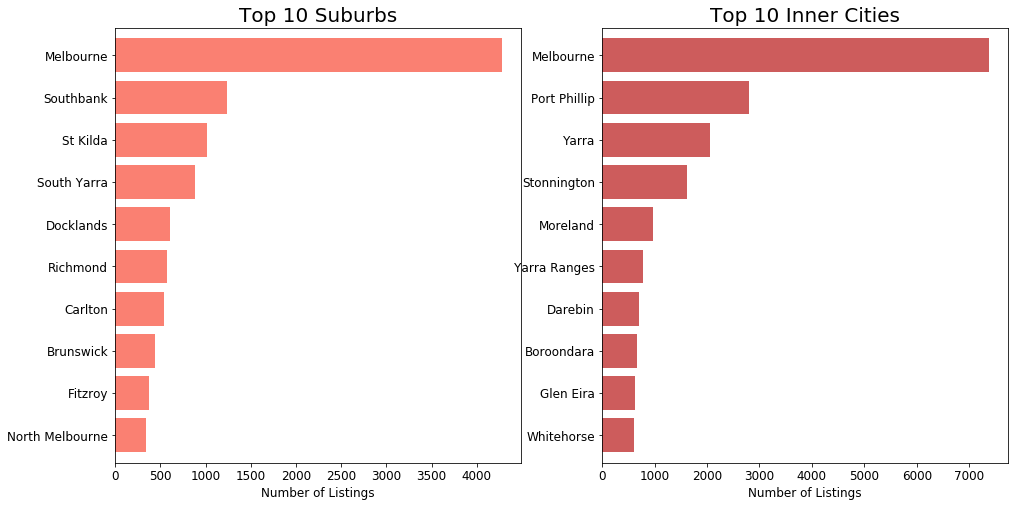

In [8]:
# cleansing suburbs
kilda = lis[lis['suburb'].notnull()]
kilda = kilda[kilda['suburb'].str.contains('ilda')]
kilda['suburb'].unique()

lis['suburb'] = lis['suburb'].replace(['St. Kilda','Saint Kilda','St Kilda / Elwood', 'St kilda',
                                       'st kilda','Saint Kilda, Victoria, AU','Elwood, St. Kilda',
                                       'Saint Kilda Beach'],'St Kilda')

lis['suburb'] = lis['suburb'].replace(['Saint Kilda East','East St. Kilda','StKilda East',
                                       'Ripponlea (East St Kilda)','St.Kilda East','East st kilda',
                                       'St Kilda east'],'St Kilda East')
lis['suburb'] = lis['suburb'].replace(['Saint Kilda West','St Kilda West Melbourne','St. Kilda West'],
                                      'St Kilda West')


#plot top suburbs and inner cities based on the number of listings
fig, axarr = plt.subplots(1, 2, figsize=(16, 8))
subb = lis['suburb'].value_counts().sort_values(ascending=True).tail(10).plot.barh(
    ax=axarr[0], fontsize=12, color='Salmon',width=0.8)
axarr[0].set_title("Top 10 Suburbs", fontsize=20)
axarr[0].set_xlabel("Number of Listings", fontsize=12)

city = lis['city'].value_counts().sort_values(ascending=True).tail(10).plot.barh(
    ax=axarr[1],fontsize=12, color='IndianRed',width=0.8)
axarr[1].set_title("Top 10 Inner Cities", fontsize=20)
axarr[1].set_xlabel("Number of Listings", fontsize=12)

# 2.1. Listings Map

This is an interactive map showing all the listings.

Zoom in and I can find that :

* Melbourne CBD has the higest density in terms of listings.
* In the CBD, Southern Cross Station area (Spencer St., Bourke St. and La Trobe St.) and Melbourne Central Station area (Elizabeth St., La Trobe St.,etc)  have the highest densities. which makes sense as those areas have many high-rise apartment buildings.

In [9]:
lat = lis['latitude']
lon = lis['longitude']
locations = list(zip(lat, lon))

map_mel = folium.Map(location=[-37.815018, 144.946014],tiles='CartoDB Positron',zoom_start=10 ) #'CartoDB dark_matter'  #melb location:-37.8136° N, 144.9631° E
FastMarkerCluster(data=locations).add_to(map_mel)
map_mel

# 3. Room Types and Property Types

On the Aribnb website, a host needs to specify the type of the property, e.g., apartment or house, and which part he/she is renting out, e.g., entirely or one room. These are the property type and room type of a listing. Let's see what are the types of the listings :

* Two thirds of the listings are renting out entirely, aound one third are private rooms.
* Most of the listings are apartments and houses.
* 75% of the apartments are renting out entirely while 60% of the houses are renting out as private rooms.

Note that I included the serviced apartments, aparthotels and condominiums in Apartment, and townhouses, guesthouses and villas in House.

Text(0.5, 0, 'Number of listings')

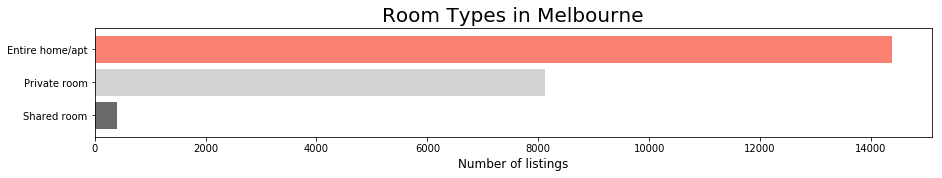

In [10]:
rt = lis['room_type'].value_counts().sort_values(ascending=True)
rt.plot.barh(figsize=(15,2), linewidth = 1, width=0.8,color=['DimGrey','LightGray','Salmon'])
plt.title('Room Types in Melbourne', fontsize=20)
plt.xlabel('Number of listings', fontsize=12)

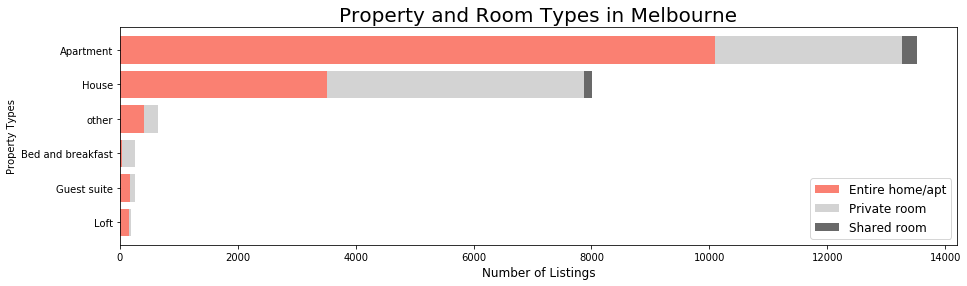

In [11]:
#plot property_type and room_type

#cleanse the property types
prop = lis.copy()
prop['property_type'] = prop['property_type'].replace(['Serviced apartment','Aparthotel','Condominium'],'Apartment')
prop['property_type'] = prop['property_type'].replace(['Townhouse','Guesthouse','Villa'],'House')

#only include top 5 property types
pt = []
for p in prop['property_type'].unique():
    if p not in prop.property_type.value_counts().sort_values(ascending=False).index[0:5]:
        pt.append(p)
    else:
        continue
        
prop['property_type'] = prop['property_type'].replace([pt],'other')

#plot
prop = prop.groupby(['property_type','room_type']).room_type.count().sort_values(ascending=False)
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop.drop(columns=['total'])

#plt.style.use('seaborn-white')
prop.plot.barh(stacked=True, color = ['Salmon','LightGray','DimGrey'],
              linewidth = 0.8, figsize=(15,4), width=0.8)
plt.title('Property and Room Types in Melbourne', fontsize=20)
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('Property Types')
plt.legend(loc = 4,prop = {"size" : 12})

# 4. Number of Guests

Airbnb limits the number of people that a property can accommodate in other cities, e.g., Paris. I haven't found any information on limitation in Melbourne yet. I found:

* The majority of the listings accommodate 2 or 4  guests.
* Most of listings accommodate within 6 guests.
* A property can accommodate as many as 16 guests in Melbourne. 


Text(0.5, 0, 'Accommodates')

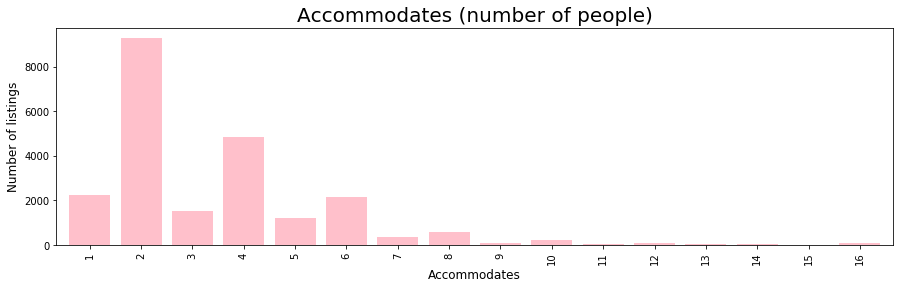

In [12]:
acc = lis['accommodates'].value_counts().sort_index(ascending=True)
acc.plot.bar(figsize=(15,4), color='pink', width=0.8)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)

# 5. Price

Now let's look at price.

# 5.1. Price by Number of Guests

First, let's  group the properties by how many people they can accommodate, we have: 

* \$65 for 1 person, 
* \$100 for 2 people,
* \$170 for 4 and 
* \$235 for 6.



Text(0, 0.5, 'Number of people')

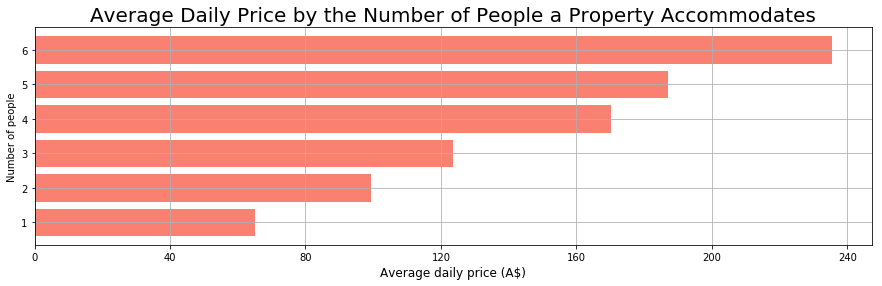

In [13]:
# price by how many guests
pac = lis[lis['accommodates']<=6]
pac = pac.groupby('accommodates')['price'].mean().sort_values(ascending=True)
pac.plot.barh(figsize=(15, 4),grid=True, color='salmon', width=0.8)
plt.title("Average Daily Price by the Number of People a Property Accommodates", fontsize=20)
plt.xticks(np.arange(0, 250, step=40))
plt.xlabel('Average daily price (A$)', fontsize=12)
plt.ylabel("Number of people")

# 5.2. Price by Property and Room Types

New, let's  group the properties by the property type and room type, we have: 

* \$360 per night for an  entire villa,
* \$290 per night for an entire house,
* \$260 per night for an entire serviced apartment,
* \$160 per night for an entire apartment,

and

* \$120 per night for a private room in an 'bed and breakfast',
* \$80 per night for a private room in an aparment or a villa,
* \$50 per night for a shared room in an apartment.

Note that we only consider a combination of property type and room type that has more than 100 listings.

Text(0, 0.5, 'Number of People')

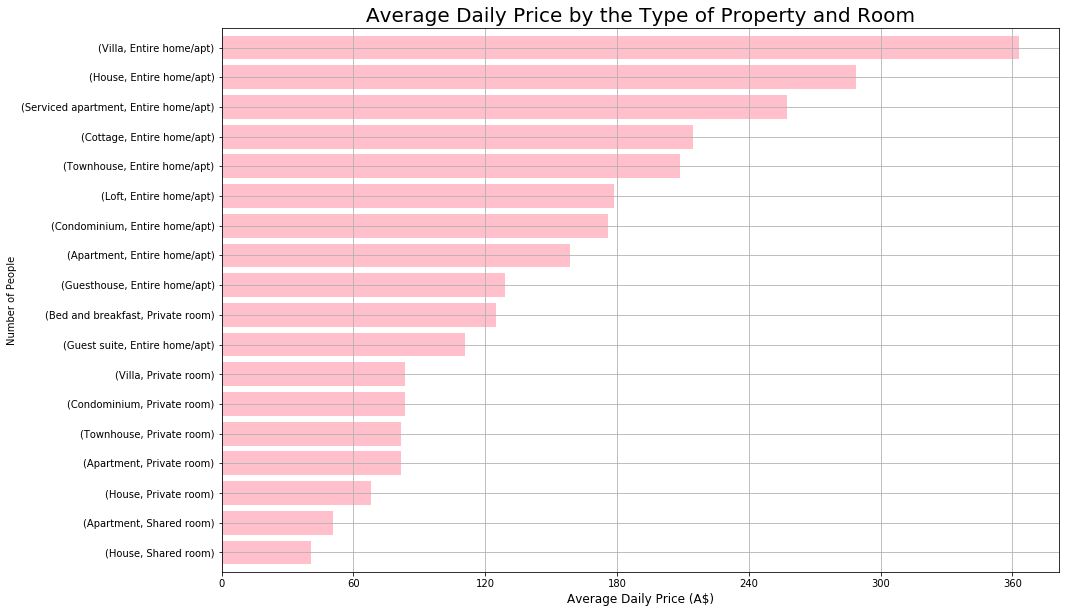

In [14]:
#price by property type and room type
prtype = lis.copy()
prtype['proroom'] = prtype['property_type']+prtype['room_type']

pr = prtype.proroom.value_counts()
prtype.proroom = prtype.proroom.map(pr)
prtype = prtype[prtype.proroom > 100] #only consider the combinatons of property and room types that have more 100 listings

ppr = prtype.groupby(['property_type', 'room_type'])['price'].mean().sort_values(ascending=True)
ppr.plot.barh(figsize=(15, 10),grid=True, color='pink', width=0.8)
plt.title("Average Daily Price by the Type of Property and Room", fontsize=20)
hn = max(prtype.groupby(['property_type', 'room_type'])['price'].mean())
plt.xticks(np.arange(0, hn, step=60))
plt.xlabel('Average Daily Price (A$)', fontsize=12)
plt.ylabel("Number of People")

# 5.3. Price by Suburbs and Cities

Next, let's go deeper. Let's see the average price of a different type of room, property and how many people it accommodates by suburbs and cities.

* For an entire apartment that accommodates 2 people, Southbank has the highest rate at \\$160, followed by Docklands, Port Melb and Melb CBD at \\$140.
* For an entire apartment that accommodates 4 people, Port Melb has the highest rate at \\$220, followed by Toorak and East Melb and Melb CBD at \\$200.
* For a private room in an apartment that accommodates 2 people, Docklands has the highest rate at \\$120, followed by Melb CBD, Windsor and Southbank at \\$100..
* For an entire house that accommodates 4 people, South Melb and Elwood have the highest rate at \\$260
* For a private room in a house that accommodates 2 people, Prahan has the highest rate at \\$110, followed by Richmond, Fitzroy and St Kilda at \\$80.


C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


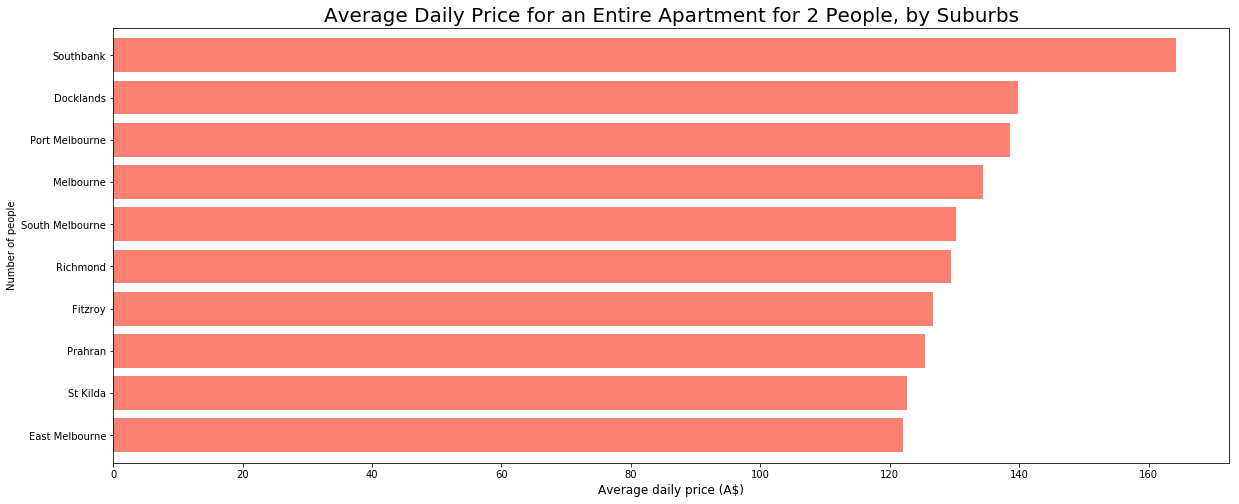

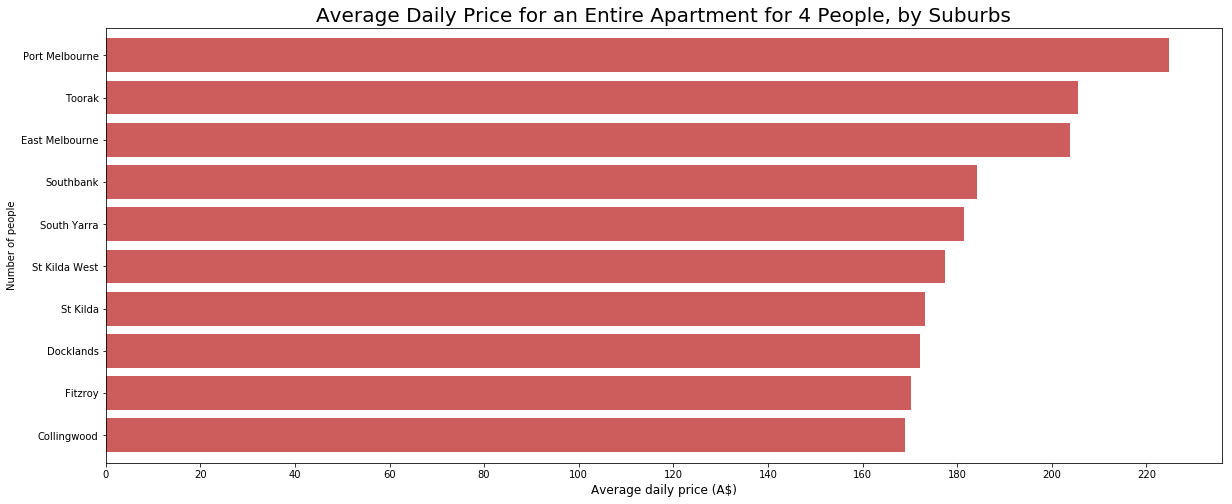

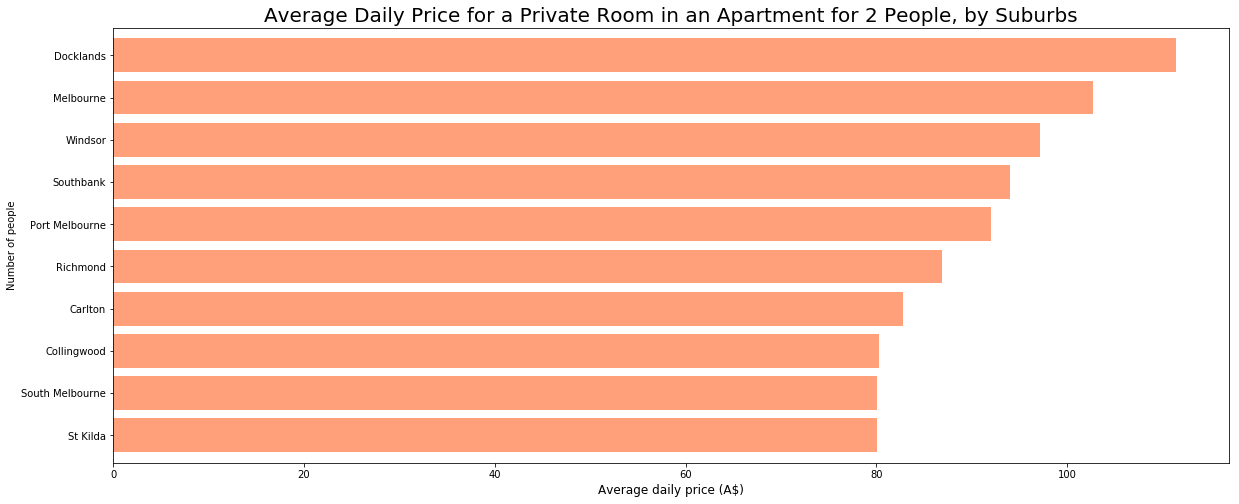

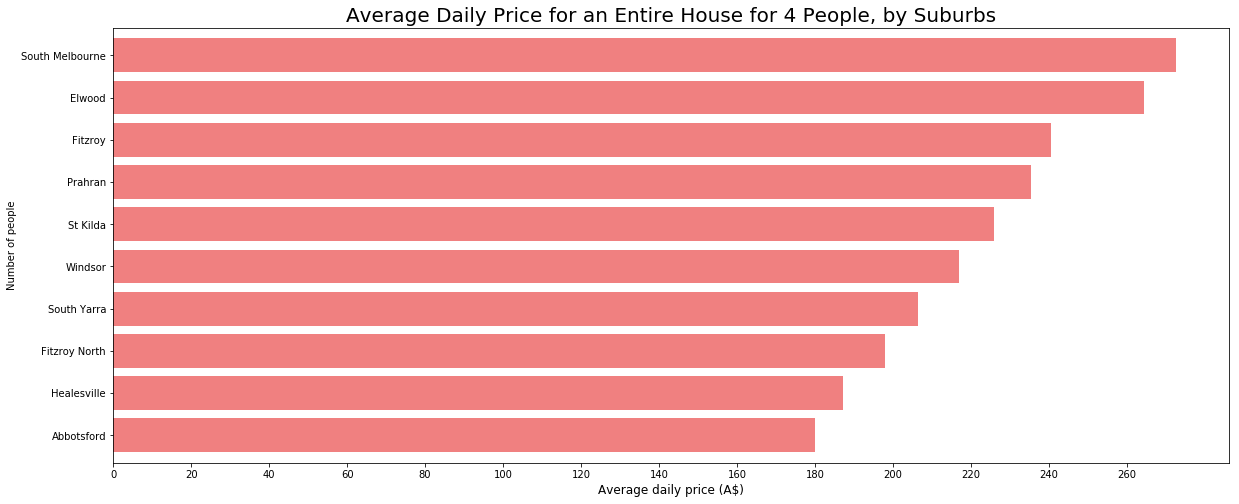

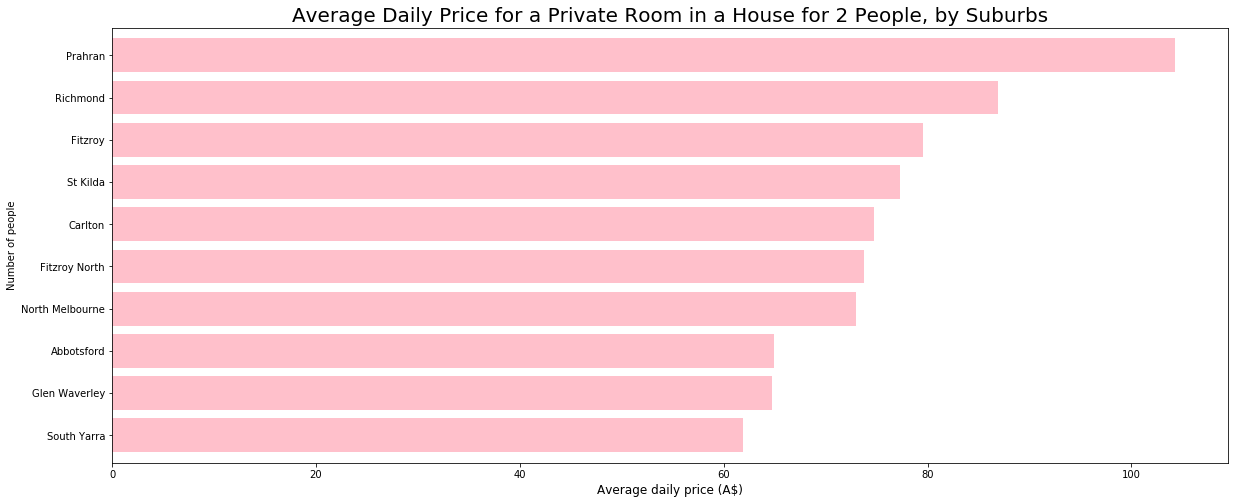

In [15]:
#prop_type + room_type + accom
def plotPriceBySub(df, prop_type, room_type, accom, nlis, color, ttl):
    df2 = df[(df['property_type'] == prop_type)&(lis['room_type'] == room_type)&(lis['accommodates'] == accom)]
    sub = df2.suburb.value_counts()
    df2['total'] = df2['suburb']
    df2['total'] = df2['total'].map(sub)
    df2 = df2[df2['total']>= nlis] #only consider the combinations that have more than 20 listings
    df2 = df2.drop(columns=['total'])

    pri = df2.groupby('suburb')['price'].mean().sort_values(ascending=True).tail(10)
    pri.plot.barh(figsize=(20, 8), color=color, width=0.8)
    title = 'Average Daily Price for '+ ttl+' for '+ str(accom)+' People, by Suburbs'
    plt.title(title, fontsize=20)
    ph = max(df2.groupby('suburb')['price'].mean())
    plt.xticks(np.arange(0, ph,step=20))
    plt.xlabel('Average daily price (A$)', fontsize=12)
    plt.ylabel("Number of people")
    plt.show()
    
plotPriceBySub(lis, 'Apartment', 'Entire home/apt', 2, 20,'salmon','an Entire Apartment')
plotPriceBySub(lis, 'Apartment', 'Entire home/apt', 4, 20,'IndianRed','an Entire Apartment' )
plotPriceBySub(lis, 'Apartment', 'Private room', 2, 20,'LightSalmon','a Private Room in an Apartment')

plotPriceBySub(lis, 'House', 'Entire home/apt', 4, 10,'LightCoral','an Entire House')
plotPriceBySub(lis, 'House', 'Private room', 2, 20,'pink','a Private Room in a House')

# 6. Hosts

Let's look into the hosts.

# 6.1. Hosts by Number of Listings

Among the 14,988 hosts, I found that:

* 83% hosts have 1 listing.
* 10% hosts have 2 listing.
* 98% hosts have less than 5 listing.
* 64 hosts have more than 20 listings.
* 12 hosts have more than 50 listings.
* The largest number of listings a host has is 98.

In [16]:
hos = lis.groupby('host_id').size().reset_index(name='num_listings')
hos = hos.sort_values(by=['num_listings'],ascending=False)

print('{}% hosts have 1 listing.'.format(int(round(hos[hos['num_listings']==1].
                                                   host_id.count()*100/hos.host_id.count()))))
print('{}% hosts have 2 listing.'.format(int(round(hos[hos['num_listings']==2].
                                                   host_id.count()*100/hos.host_id.count()))))
print('{}% hosts have less than 5 listing.'.format(int(round(hos[hos['num_listings']<=5].
                                                             host_id.count()*100/hos.host_id.count()))))
print('{} hosts have more than 20 listings.'.format(hos[hos['num_listings']>=20].host_id.count()))
print('{} hosts have more than 50 listings.'.format(hos[hos['num_listings']>=50].host_id.count()))
print('The largest number of listings a host has is {}.'.format(max(hos['num_listings'])))

83% hosts have 1 listing.
10% hosts have 2 listing.
98% hosts have less than 5 listing.
64 hosts have more than 20 listings.
12 hosts have more than 50 listings.
The largest number of listings a host has is 98.


# 6.2. About the Hosts

Let's look into who are the hosts:

* 14988 hosts.
* 3119 (20%) are superhosts.
* 361 hosts who have more than 10 listings, or their listings are specified as a serviced apartment, hotel, boutique hotel or aparthotel. So they are very likely to be professional hosts.
* 11434 (76%) hosts from Melbourne.
* 14065 (94%) hosts from Australia.
* 188 (1.25%) hosts from China.
* 130 (<1%) hosts from US.
* 82 (<1%) hosts from UK.
* 21 (<1%) hosts from New Zealand.

In [17]:
#make a copy
hosts = lis.copy()
hosts = hosts[['host_id','host_name','host_since','host_location','host_is_superhost',
                'host_identity_verified','host_verifications']]
#how many superhosts
print('{} Superhosts'.format(hosts.groupby('host_is_superhost').host_id.nunique()[1]))

# pro
prohos = lis[(lis['property_type']=='Serviced apartment')|
   (lis['property_type']=='Boutique hotel')|
   (lis['property_type']=='Hotel')|
   (lis['property_type']=='Aparthotel')|
   (lis['calculated_host_listings_count']>=10)].host_id.nunique()
print(prohos,'professional hosts.')

#cleanse host location
#hosts['host_location'] = hosts['host_location'].replace('AU','Australia')

#how many hosts are local and 
tothos = hosts['host_id'].nunique()
mehos = hosts[hosts['host_location'].str.contains('(?i)victoria',na=False)].host_id.nunique()
auhos = hosts[hosts['host_location'].str.contains('(?i)australia',na=False)].host_id.nunique()
cnhos = hosts[(hosts['host_location'].str.contains('(?i)china',na=False))|
             (hosts['host_location'].str.contains('(?i)cn',na=False))].host_id.nunique()
ushos = hosts[hosts['host_location'].str.contains('(?i)united states',na=False)].host_id.nunique()
ukhos = hosts[hosts['host_location'].str.contains('(?i)united kingdom',na=False)].host_id.nunique()
nzhos = hosts[hosts['host_location'].str.contains('(?i)zealand',na=False)].host_id.nunique()
nzhos

print('{} ({}%) hosts from Melbourne.'.format(mehos,int(round(mehos/tothos,2)*100)))
print('{} ({}%) hosts from Australia.'.format(auhos,int(round(auhos/tothos,2)*100)))
print('{} ({}%) hosts from China.'.format(cnhos, round(cnhos/tothos,4)*100))
print('{} ({}%) hosts from US.'.format(ushos,round(ushos*100/tothos,2)))
print('{} ({}%) hosts from UK.'.format(ukhos,round(ukhos*100/tothos,2)))
print('{} ({}%) hosts from New Zealand.'.format(nzhos,round(nzhos*100/tothos,2)))

3119 Superhosts
361 professional hosts.
11434 (76%) hosts from Melbourne.
12137 (81%) hosts from Australia.
188 (1.25%) hosts from China.
130 (0.87%) hosts from US.
82 (0.55%) hosts from UK.
21 (0.14%) hosts from New Zealand.


# 7. Feature Correlation Plot


This is a heatmap that plots the correlations of the features of a listing.

It shows that the room type, the number of guests and other features are positively correlated with price. So it was a good idea that I ploted the prices against the room type and accommodate features. It also would be interesting to do some further feature correlation experiments.

C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

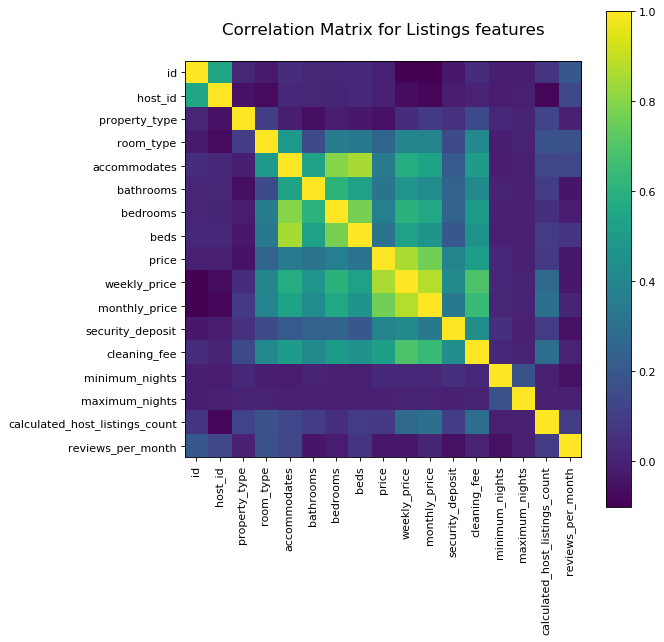

In [18]:
small_details = ['id','name','host_id', 'city','suburb', 'property_type', 
                  'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
                  'price', 'weekly_price', 'monthly_price', 'security_deposit',
                  'cleaning_fee','minimum_nights','maximum_nights', 
                  'instant_bookable', 'cancellation_policy','calculated_host_listings_count', 
                  'reviews_per_month'
                 ] 
lismal = lis[small_details]

# convert property_type 
lismal['property_type'] = lismal['property_type'].replace(['Hotel','Farm stay',
        'Cottage', 'Other', 'Boutique hotel',
       'Earth house', 'Bungalow', 'Tiny house', 'Nature lodge',
       'Cabin', 'Hostel', 'Barn', 'Train', 'Boat', 'Camper/RV',
       'Campsite', 'Treehouse', 'Tent', 'Chalet', 'Aparthotel', 'Castle',
       'Resort', 'Hut', 'Minsu (Taiwan)', 'Casa particular (Cuba)'],'Rare')
proty_mapping = {'Apartment':10, 'House ':9, 'Townhouse':8, 'Condominium':7, 'Serviced apartment':6,'Villa':5,
                'Guesthouse':4, 'Bed and breakfast':3,'Guest suite':2, 'Loft':1, 'Rare':0}

lismal['property_type'] = lismal['property_type'].map(proty_mapping)

#convert room_type
roty_mapping = {'Entire home/apt':3, 'Private room':2, 'Shared room':1}

lismal['room_type'] = lismal['room_type'].map(roty_mapping)

# plot heatmap
corr = lismal.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title('Correlation Matrix for Listings features', fontsize=15)
plt.show()